# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [110]:
pip install plotly.express

Note: you may need to restart the kernel to use updated packages.


In [111]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [4]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

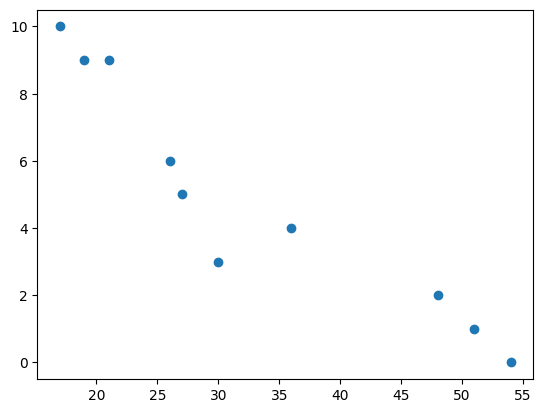

In [5]:
# Your code here

x = student_data["Age"]
y = student_data["Tardies"]

plt.scatter(student_data["Age"],student_data["Tardies"])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

It seems like they are negativly correlated

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# your code here
cov_matrix = np.cov(x,y)
corr_matrix = np.corrcoef(x,y)

display(cov_matrix)
display(corr_matrix)

### The covariance tells us that as x increases, y decreases by around 45.
### From the correlation matrix we can see that it is clearly negatively correlated, meaning that with rising age, the tardies become less.


array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

array([[ 1.        , -0.93916269],
       [-0.93916269,  1.        ]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [116]:
# your explanation here
lm = LinearRegression()
lm.fit(x,y)

x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)


y_pred = lm.predict(x)


slope = lm.coef_
intercept = lm.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


## I use the tardies as my outcome variable and use a linear regression.

Slope: [[-0.24282077]]
Intercept: [12.88880336]


c:\Users\dusan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Plot your regression model on your scatter plot.

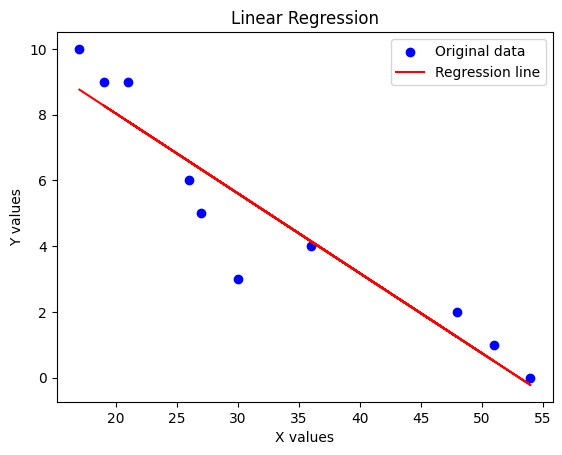

In [117]:
# Your code here.

plt.scatter(x,y,color="blue", label = "Original data")
plt.plot(x,y_pred,color="red", label = "Regression line")


plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Linear Regression")

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [118]:
# R-squared value
r_squared = model.score(x, y)
print(f"R-squared: {r_squared}")


R-squared: -62.11963406050956


In [119]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.3319201847356268


In [120]:
# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1.1540884648655088


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*
The r-squared is fairly high with 0.88 and the mse is low with 1,3. Therefore i can be pretty confident.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [121]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [122]:
# Your code here.

year = vehicles["Year"]
cylinders = vehicles["Cylinders"]
fuel = vehicles["Fuel Barrels/Year"]
comb_mpg = vehicles["Combined MPG"]
fuel_cost = vehicles["Fuel Cost/Year"]
emission = vehicles["CO2 Emission Grams/Mile"]

list = (year, cylinders, fuel, comb_mpg, fuel_cost)
feature_names = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']

df = pd.DataFrame({})
results = []
for i in list:

    corr_matrix = np.corrcoef(i,emission)[0,1]
    results.append(corr_matrix)

df["Features"] = feature_names
df["Correlation"]= results
display(df)

##year provides the least amount of information  fuel barrels/year gives the most information

,Features,Correlation
0,Year,-0.222300
1,Cylinders,0.752393
2,Fuel Barrels/Year,0.986189
3,Combined MPG,-0.926229
4,Fuel Cost/Year,0.930865


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [123]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [124]:
# Your code here.
from sklearn.model_selection import train_test_split

# Select only the desired columns from the dataframe
vehicles_selected = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]]

# If you want to update the original dataframe, you can do:
vehicles = vehicles_selected

x_vehicles = vehicles.drop("CO2 Emission Grams/Mile", axis =1)
y_vehicles = vehicles["CO2 Emission Grams/Mile"]

x_train, x_test, y_train, y_test = train_test_split(x_vehicles, y_vehicles, test_size=0.2, random_state=42)


###Lin-Reg

model = LinearRegression()
results = model.fit(x_train,y_train)


y_pred = model.predict(x_test)



Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [125]:
# Your code here.



# Print slope (coefficients) and intercept
print("Slope (coefficients):", model.coef_)
print("Intercept:", model.intercept_)

# Calculate the model's R-squared score
r_squared = model.score(x_test, y_test)
print("R-squared score:", r_squared)

#MSE

mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:", mse)

#RMSE
rmse = np.sqrt(289.83)
print(f"Root Mean Squared Error: {rmse}")

# FUEL Barrels has the most impact. For each additional fuel barrel consumed per year, CO2 emissions increase by 19.23 grams per mile.
# # R-squared: The model explains 97.9% of the variance in CO2 emissions, which is excellent.
# # RMSE of 17 makes sense 

Slope (coefficients): [-0.31558675  1.79402632 19.23102729 -2.9335732   0.03197145]
Intercept: 755.6935073143708
R-squared score: 0.9794542628636334
Mean Squared Error: 289.82774408137766
Root Mean Squared Error: 17.02439426235189


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [126]:
# Your code here.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data
X = [1, 3, 4, 6, 8, 9, 11, 14]
Y = [1, 2, 4, 4, 5, 7, 8, 13]

# Create a DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})
print(data)

    X   Y
0   1   1
1   3   2
2   4   4
3   6   4
4   8   5
5   9   7
6  11   8
7  14  13


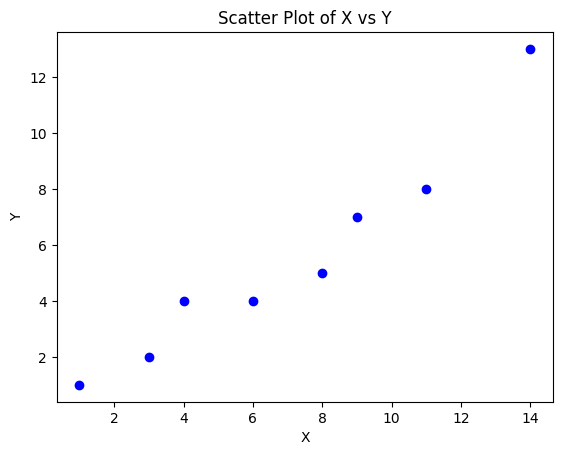

In [127]:
plt.scatter(data['X'], data['Y'], color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot of X vs Y")
plt.show()

In [128]:
from sklearn.model_selection import train_test_split

# Reshape the data for sklearn
X_reshaped = data['X'].values.reshape(-1, 1)
Y = data['Y'].values

# Split into train and test sets (you can skip this step if just exploring the whole data)
x_train, x_test, y_train, y_test = train_test_split(X_reshaped, Y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

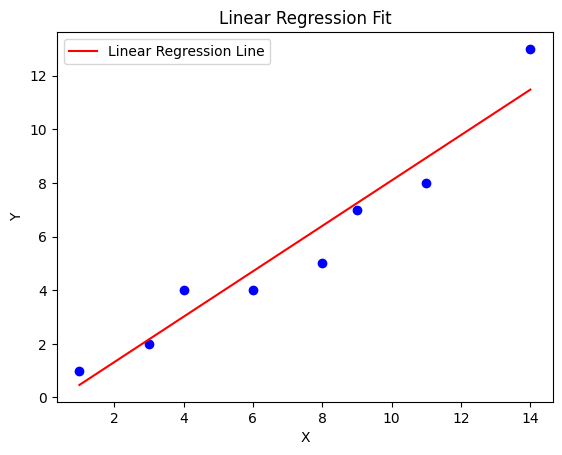

In [129]:
# Your code here.
plt.scatter(data['X'], data['Y'], color='blue')
plt.plot(data['X'], model.predict(X_reshaped), color='red', label="Linear Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [130]:
# Your response here.
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R-squared score:", r_squared)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)



R-squared score: 0.9930868801319517
Mean Squared Error: 0.043206999175302255
Root Mean Squared Error: 0.20786293362526725


*your explanation here*

# R-squared is close to 1 meaning a very good fit
# MSE is close to 0 which is also good, same fpr RMSE 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [131]:
#I dont see any

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*

# there was no real outlier, so i didnt change anything. the statistics are already pretty good-